# Projeto 2

In [ ]:
# instalando depencias
!pip3 install numpy
!pip3 install matplotlib
!pip3 install scipy
!pip3 install pydub

In [1]:
# importando dependencias
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import math
import pydub
import time
from pydub import AudioSegment
from pydub.playback import play
from PIL import Image

## DCT

In [2]:
# DCT
def DCT1D(data):
    N = len(data)
    X = np.zeros(N)
    ak = math.sqrt(2.0/N)
    
    for k in range(N):
        ck = math.sqrt(1.0/2.0) if k == 0 else 1        
        s = 0
        
        for n in range(N):
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            two_n = 2.0 * N
            
            s += data[n] * math.cos((q/two_n) + (w/two_n))
        
        X[k] = ak * ck * s
    
    return X

## IDCT

In [3]:
def IDCT1D(data):
    N = len(data)
    x = np.zeros(N)
    
    ak = math.sqrt(2.0/N)
    
    for n in range(N):
        s = 0
        for k in range(N):
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            two_n = 2.0 * N
            ck = math.sqrt(1.0/2.0) if k == 0 else 1
                
            s += ck * data[k] * math.cos((q/two_n) + (w/two_n))
            
        x[n] = ak * s
    
    return x
    

### Testes DCT e IDCT

In [ ]:
x = np.array([5.9285,2.1515,0.4693,-0.5441,0.9595,3.6881,4.0156])

X_DCT = DCT1D(x)
X_IDCT = IDCT1D(X_DCT)

In [ ]:
x

In [ ]:
X_IDCT

# Audio

In [5]:
# Read Wav File
filename = "MaisUmaSemana.wav"
portion_slice = 2000
base = 20000
audio_rate, audio_data = wavfile.read("./" + filename)
# audio_portion = audio_data[base:base+portion_slice]
audio_portion = audio_data
audio_data.shape

(45498,)

In [6]:
# draw audio wave graph
def plot_audio_wave(data, figsize=[20,6], color="blue", y_label="Amplitude", stroke=0.5, title=""):
    plt.figure('Data', figsize=figsize)
    plt.plot(data, linewidth=stroke,alpha=1,color=color)
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

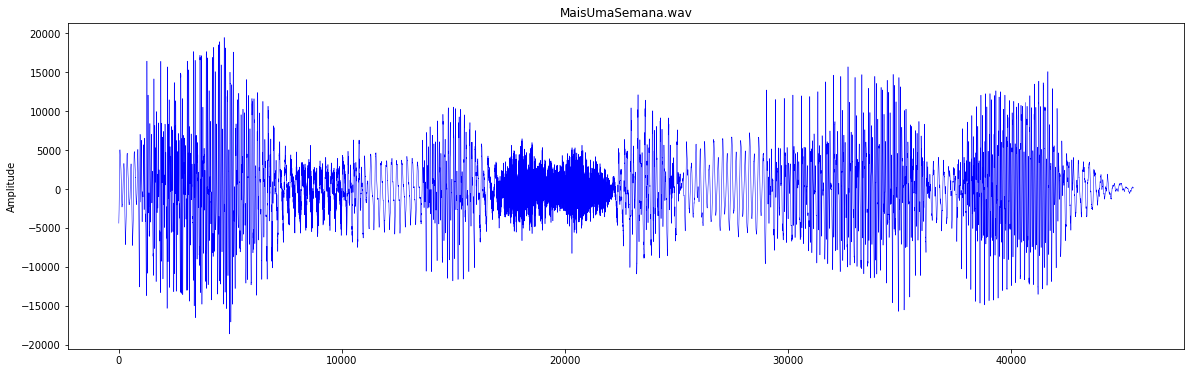

In [7]:
plot_audio_wave(audio_data, title=filename)
# plot_audio_wave(audio_portion, title="{} - {} Slice".format(filename, portion_slice))

## DCT AUDIO

In [8]:
print("DCT audio...")
inicio = time.time()
DCT = DCT1D(audio_portion)
fim = time.time()
print("DCT Done! - took {:3f} seconds" .format((fim - inicio)*1000.0))

DCT audio...
DCT Done! - took 5098691.232204 seconds


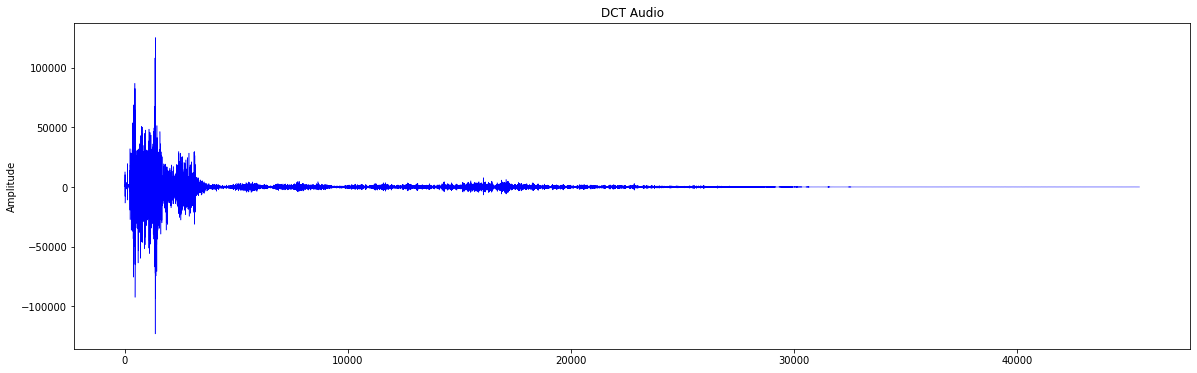

Nivel DC: 2183.6442487570853


In [9]:
plot_audio_wave(DCT, title="DCT Audio")
print("Nivel DC: {}".format(DCT[0]))

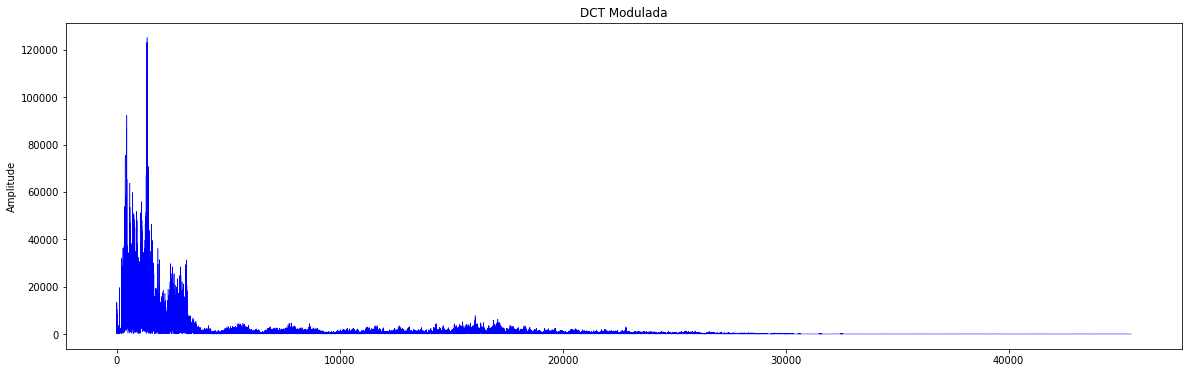

Numero de frequências desejadas?  5000


In [10]:
DCT_filtered = DCT.copy()
DCT_values = DCT_filtered.copy()
selected_frequencies = []

# Valores modulados
for i in range(len(DCT)):
    DCT_values[i] = abs(DCT_values[i])
    
plot_audio_wave(DCT_values, title="DCT Modulada")
num = int(input("Numero de frequências desejadas? "))

In [11]:
aux = DCT_values.copy()
aux_sorted = list(enumerate(aux))

def sortKey(e):
    return e[1]

aux_sorted.sort(key=sortKey)
aux_sorted = aux_sorted[::-1]

selected_frequencies = [aux_sorted[i][0] for i in range(num)]
selected_frequencies.insert(0, aux[0])

# freq_selecionadas

In [12]:
for i in range(len(DCT_filtered)):
    if i not in selected_frequencies:
        DCT_filtered[i] = 0
        
# print(freq_selecionadas)

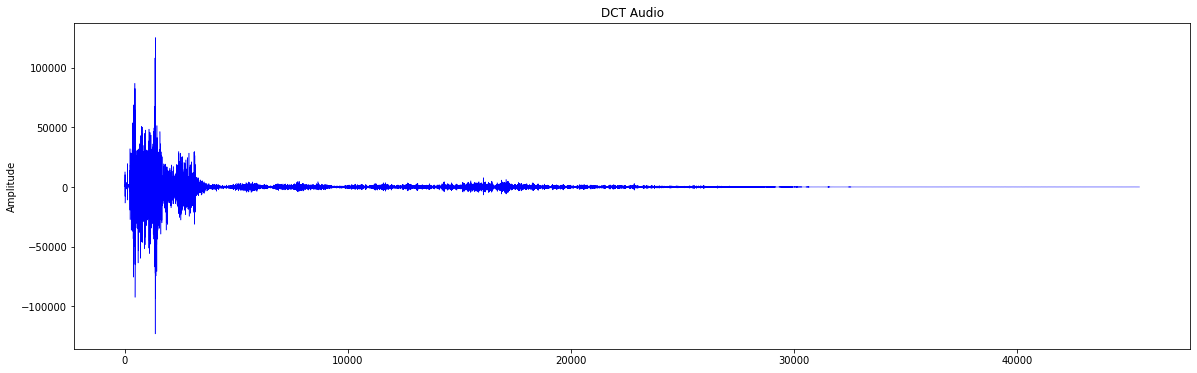

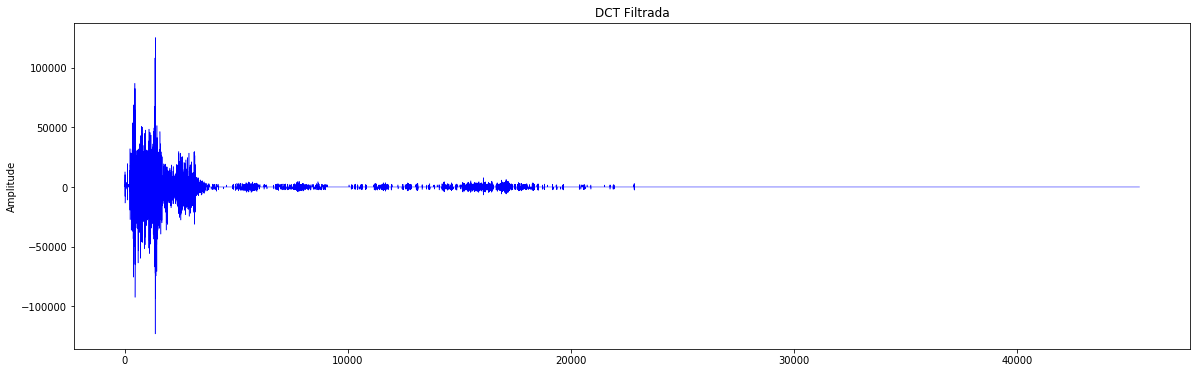

In [13]:
plot_audio_wave(DCT, title="DCT Audio")
plot_audio_wave(DCT_filtered, title="DCT Filtrada")

In [15]:
# IDCT
print("IDCT audio...")
inicio = time.time()
IDCT = IDCT1D(DCT_filtered)
fim = time.time()
print("IDCT Done! - took {:3f} seconds" .format((fim - inicio)))


IDCT audio...
IDCT Done! - took 1932.608715 seconds


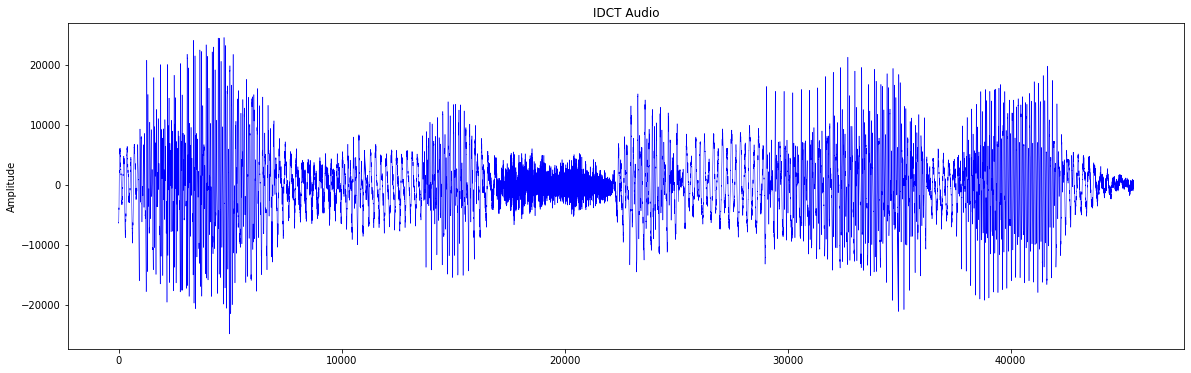

In [18]:
plot_audio_wave(IDCT, title="IDCT Audio")

In [17]:
from scipy import fftpack
# audio_tranformado = IDCT1D(DCT)
# audio_tranformado = fftpack.idct(DCT_filtered, norm="ortho")
audio_tranformado = IDCT
audio_tranformado *= 1.3
audio_tranformado = audio_tranformado.astype("int16")

wavfile.write("IDCT3.wav", audio_rate, audio_tranformado)

# DCT Imagem

In [ ]:
# Display the original Image
def show(img_array, scale=(60,6), title = ""):
    plt.figure(figsize = scale)
    plt.title(title)
    plt.imshow(img_array, aspect="equal", origin="upper",cmap='gray')

In [ ]:
imagem = Image.open("lena.bmp")
imagem = np.asarray(imagem)
print(imagem)

In [ ]:
plt.imshow(imagem, cmap="gray")
plt.show()

In [ ]:
imagem.shape

In [ ]:
ImagemDCT = np.zeros(imagem.shape)

In [ ]:
ImagemDCT.shape

In [ ]:
ImagemDCT

In [ ]:
# aplicar DCT verticalmente
inicio = time.time()
for i, linha in enumerate(imagem):
#     ImagemDCT[i] = DCT1D(linha)
    ImagemDCT[i] = fftpack.dct(linha)
fim = time.time()
print("Levou: {}".format((fim - inicio)))
    #     ImagemDCT[i] = fftpack.dct(linha, norm="ortho")

In [ ]:
plt.imshow(ImagemDCT)

In [ ]:
ImagemDCT_Trans = ImagemDCT.T

In [ ]:
# Aplica DCT nas colunas
for i, linha in enumerate(ImagemDCT_Trans):
    ImagemDCT_Trans[i] = fftpack.dct(linha)

In [ ]:
# plt.imshow(ImagemDCT_Trans.T)
show(ImagemDCT_Trans.T)

In [ ]:
ImagemDCT_Trans.T[0][0]

In [ ]:
a = ImagemDCT_Trans.T

In [ ]:
# a[0][0]
a[0][1]

In [ ]:
# Zerando o DC
a[0][0] = 0
show(a, title="DCT Imagem", scale=[80,8])
# plt.imshow(a)

# Volta

In [ ]:
imgIDCT = np.zeros(imagem.shape)
imgIDCT

In [ ]:
for i, linha in enumerate(ImagemDCT_Trans.T):
    imgIDCT[i] = fftpack.idct(linha)

In [ ]:
show(imgIDCT)

In [ ]:
imgIDCT_Trans = imgIDCT.T

In [ ]:
for i, linha in enumerate(imgIDCT_Trans):
    imgIDCT_Trans[i] = fftpack.idct(linha)

In [ ]:
show(imgIDCT_Trans.T)